<a href="https://colab.research.google.com/github/karank420/Machine-Learning/blob/main/Gurkaran_Karwal_Lab__2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab #2

First and Last Name: Gurkaran Karwal

Student ID: 500831607

Video URL: No Video Necessary

Didnt

EDA

   row.names  sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  \
0          1  160    12.00  5.73      23.11  Present     49    25.30    97.20   
1          2  144     0.01  4.41      28.61   Absent     55    28.87     2.06   
2          3  118     0.08  3.48      32.28  Present     52    29.14     3.81   
3          4  170     7.50  6.41      38.03  Present     51    31.99    24.26   
4          5  134    13.60  3.50      27.78  Present     60    25.99    57.34   

   age  chd  
0   52    1  
1   63    1  
2   46    0  
3   58    1  
4   49    1  
Shape of dataset: (462, 11)
row.names      int64
sbp            int64
tobacco      float64
ldl          float64
adiposity    float64
famhist       object
typea          int64
obesity      float64
alcohol      float64
age            int64
chd            int64
dtype: object
0    65.367965
1    34.632035
Name: chd, dtype: float64
row.names    0
sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea     

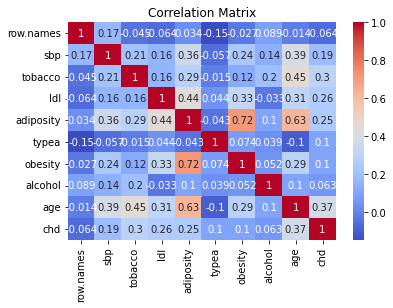

age          0.372973
tobacco      0.299718
ldl          0.263053
adiposity    0.254121
sbp          0.192354
typea        0.103156
obesity      0.100095
row.names    0.063808
alcohol      0.062531
Name: chd, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the heart disease dataset
url = 'https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv'
df = pd.read_csv(url)

# Check the first few rows of the dataset
print(df.head())

# Check the shape of the dataset
print('Shape of dataset:', df.shape)

# Check the data types of the variables
print(df.dtypes)

# Calculate the percentage of each class
print(df['chd'].value_counts(normalize=True) * 100)

# Check for missing values
print(df.isnull().sum())

# Check the number of categorical variables
print('Number of categorical variables:', len(df.select_dtypes(include='object').columns))

# Compute the correlation matrix
corr = df.corr()

# Plot the correlation matrix
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

# Find the features with the highest correlation
corr_chd = corr['chd'].abs().sort_values(ascending=False)
print(corr_chd[1:])


One-Hot-Encoding

In [ ]:




heart_df = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv")

# Convert the "famhist" column to categorical data type
heart_df["famhist"] = pd.Categorical(heart_df["famhist"])

# Perform one-hot encoding on the "famhist" column
encoded_df = pd.get_dummies(heart_df, columns=["famhist"])

print(encoded_df.head())



   row.names  sbp  tobacco   ldl  adiposity  typea  obesity  alcohol  age  \
0          1  160    12.00  5.73      23.11     49    25.30    97.20   52   
1          2  144     0.01  4.41      28.61     55    28.87     2.06   63   
2          3  118     0.08  3.48      32.28     52    29.14     3.81   46   
3          4  170     7.50  6.41      38.03     51    31.99    24.26   58   
4          5  134    13.60  3.50      27.78     60    25.99    57.34   49   

   chd  famhist_Absent  famhist_Present  
0    1               0                1  
1    1               1                0  
2    0               0                1  
3    1               0                1  
4    1               0                1  


Standardization

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

heart_df = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv")

# Get the non-categorical columns
numeric_columns = heart_df.select_dtypes(include=["float64", "int64"]).columns

# Perform standardization on the numeric columns
scaler = StandardScaler()
heart_df[numeric_columns] = scaler.fit_transform(heart_df[numeric_columns])

print(heart_df.head())


   row.names       sbp   tobacco       ldl  adiposity  famhist     typea  \
0  -1.726055  1.058564  1.823073  0.478412  -0.295503  Present -0.418470   
1  -1.718581  0.277089 -0.790237 -0.159680   0.412140   Absent  0.193344   
2  -1.711107 -0.992806 -0.774980 -0.609245   0.884332  Present -0.112563   
3  -1.703633  1.546985  0.842264  0.807126   1.624141  Present -0.214532   
4  -1.696158 -0.211332  2.171805 -0.599577   0.305351  Present  0.703189   

    obesity   alcohol       age       chd  
0 -0.176786  3.277738  0.629336  1.373863  
1  0.671373 -0.612745  1.383115  1.373863  
2  0.735519 -0.541183  0.218184 -0.727875  
3  1.412621  0.295062  1.040488  1.373863  
4 -0.012856  1.647775  0.423760  1.373863  


Hypothesis

In [ ]:
import numpy as np

def sigmoid(z):


    s = 1 / (1 + np.exp(-z))

    return s


Cost-Function

In [ ]:
import numpy as np

def binary_cross_entropy_loss(y_true, y_pred):
    """
    Compute the binary cross-entropy loss for a set of training examples.

    Arguments:
    y_true -- A numpy array of shape (m, 1) containing the true binary labels (0 or 1).
    y_pred -- A numpy array of shape (m, 1) containing the predicted probabilities.

    Returns:
    cost -- The binary cross-entropy loss.
    """

    # Ensure the inputs are numpy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Ensure the inputs have the same shape
    assert y_true.shape == y_pred.shape

    # Compute the loss
    m = y_true.shape[0]
    cost = (-1 / m) * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    # Ensure the loss is a scalar value
    cost = np.squeeze(cost)

    return cost


Batch Gradient Descent

In [ ]:
import numpy as np

def batch_gradient_descent(X, y, alpha=0.01, num_iterations=1000, verbose=False):
    """
    Perform batch gradient descent to find the optimal weights (thetas).

    Arguments:
    X -- A numpy array of shape (m, n) containing the features of the training examples.
    y -- A numpy array of shape (m, 1) containing the true binary labels (0 or 1) for the training examples.
    alpha -- The learning rate.
    num_iterations -- The number of iterations to perform.
    verbose -- Whether to print the cost at every iteration.

    Returns:
    thetas -- The optimal weights (thetas).
    costs -- The binary cross-entropy loss at every iteration.
    """

    # Ensure the inputs are numpy arrays
    X = np.array(X)
    y = np.array(y)

    # Ensure the inputs have the same number of training examples
    assert X.shape[0] == y.shape[0]

    # Initialize the weights (thetas) to zeros
    thetas = np.zeros((X.shape[1], 1))

    # Initialize the cost history
    costs = []

    # Loop over the specified number of iterations
    for i in range(num_iterations):
        # Compute the predicted probabilities for each training example
        z = np.dot(X, thetas)
        y_pred = sigmoid(z)

        # Compute the binary cross-entropy loss
        cost = binary_cross_entropy_loss(y, y_pred)
        costs.append(cost)

        # Compute the gradient of the cost with respect to the weights
        grad = np.dot(X.T, (y_pred - y)) / len(y)

        # Update the weights
        thetas = thetas - alpha * grad

        # Optionally print the cost at every iteration
        if verbose:
            print("Iteration {}: Cost = {}".format(i+1, cost))

    return thetas, costs


Initialization

In [ ]:
import numpy as np

# Generate random initial weights (thetas)
thetas = np.random.rand(10, 1)


Mini-Batch Descent Iteration

<ipython-input-13-52b2bef46209>:39: RuntimeWarning: divide by zero encountered in log
  cost = -1/m * (y.dot(np.log(h)) + (1-y).dot(np.log(1-h)))
<ipython-input-13-52b2bef46209>:39: RuntimeWarning: divide by zero encountered in log
  cost = -1/m * (y.dot(np.log(h)) + (1-y).dot(np.log(1-h)))
<ipython-input-13-52b2bef46209>:39: RuntimeWarning: divide by zero encountered in log
  cost = -1/m * (y.dot(np.log(h)) + (1-y).dot(np.log(1-h)))


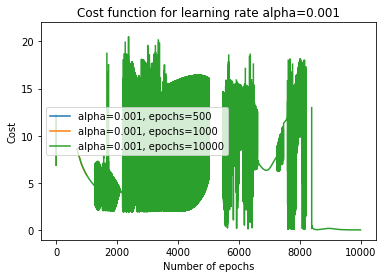

<ipython-input-13-52b2bef46209>:39: RuntimeWarning: divide by zero encountered in log
  cost = -1/m * (y.dot(np.log(h)) + (1-y).dot(np.log(1-h)))
<ipython-input-13-52b2bef46209>:39: RuntimeWarning: divide by zero encountered in log
  cost = -1/m * (y.dot(np.log(h)) + (1-y).dot(np.log(1-h)))
<ipython-input-13-52b2bef46209>:39: RuntimeWarning: divide by zero encountered in log
  cost = -1/m * (y.dot(np.log(h)) + (1-y).dot(np.log(1-h)))


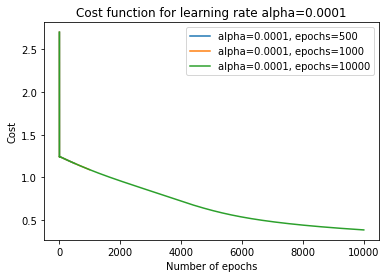

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv')

# One-hot-encode the categorical variable
data = pd.get_dummies(data, columns=['famhist'])

# Normalize the numerical features
num_cols = ['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']
data[num_cols] = (data[num_cols] - data[num_cols].mean()) / data[num_cols].std()

# Extract features and labels
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Add intercept term to X
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Set the number of examples and features
m, n = X.shape

# Set the batch size
batch_size = 50

# Initialize the weights randomly
np.random.seed(0)
theta = np.random.rand(n)

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the cost function for binary cross entropy
def cost_function(theta, X, y):
    h = sigmoid(X.dot(theta))
    cost = -1/m * (y.dot(np.log(h)) + (1-y).dot(np.log(1-h)))
    return cost

# Define the function for updating the weights (thetas) iteratively
def batch_gradient_descent(theta, X, y, alpha, num_epochs, batch_size):
    # Set up variables to store the cost function history
    cost_history = np.zeros(num_epochs)
    num_batches = m // batch_size

    for epoch in range(num_epochs):
        for i in range(num_batches):
            # Select a mini-batch of examples
            X_batch = X[i*batch_size:(i+1)*batch_size]
            y_batch = y[i*batch_size:(i+1)*batch_size]

            # Calculate the gradient for the mini-batch
            h = sigmoid(X_batch.dot(theta))
            gradient = 1/batch_size * X_batch.T.dot(h-y_batch)

            # Update the weights
            theta = theta - alpha * gradient

        # Calculate the cost function for the epoch
        cost = cost_function(theta, X, y)
        cost_history[epoch] = cost

    return theta, cost_history

# Set up the learning rates and number of epochs to try
learning_rates = [0.001, 0.0001]
num_epochs_list = [500, 1000, 10000]

# Loop over the learning rates and number of epochs
for alpha in learning_rates:
    for num_epochs in num_epochs_list:
        # Run mini-batch gradient descent
        theta_final, cost_history = batch_gradient_descent(theta, X, y, alpha, num_epochs, batch_size)

        # Plot the cost function over time
        plt.plot(range(num_epochs), cost_history, label=f'alpha={alpha}, epochs={num_epochs}')

    plt.title(f'Cost function for learning rate alpha={alpha}')
    plt.xlabel('Number of epochs')
    plt.ylabel('Cost')
    plt.legend()
    plt.show()



